# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [4]:
P_A = 1/2
P_B_given_A = 30/40
P_B_given_not_A = 20/40

P_not_A = 1 - P_A
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)
P_A_given_B = (P_B_given_A * P_A) / P_B

print( P_A_given_B)

0.6


What is the probability that it came from Bowl 2?

In [6]:
P_Bowl2_given_B = 1 - P_A_given_B

print( P_Bowl2_given_B)

0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [8]:
P_A = 1/2
P_B_given_A = 10/40
P_B_given_not_A = 20/40


P_not_A = 1 - P_A
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)
P_A_given_B = (P_B_given_A * P_A) / P_B
P_Bowl2_given_B = 1 - P_A_given_B

print( P_A_given_B)
print( P_Bowl2_given_B)

0.3333333333333333
0.6666666666666667


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

What is the probability that the yellow candy came from Bag 2?

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [ ]:
# Probability is 2/3 door c

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

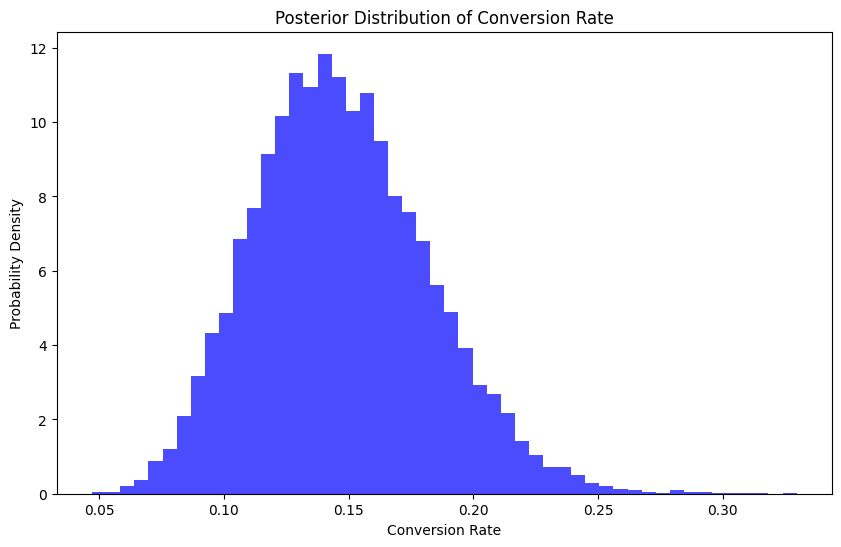

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

prior_alpha = 1
prior_beta = 1

# Obsr.
n_visitors = 100
n_signups = 14

# Parametros
posterior_alpha = prior_alpha + n_signups
posterior_beta = prior_beta + n_visitors - n_signups

# distribuicao
samples = beta.rvs(posterior_alpha, posterior_beta, size=10000)

# plots
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of Conversion Rate')
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [12]:
mean = np.mean(samples)
median = np.median(samples)
mode = samples[np.argmax(np.histogram(samples, bins=50)[0])]
std = np.std(samples)
lower_bound_95 = np.percentile(samples, 2.5)
upper_bound_95 = np.percentile(samples, 97.5)

print(mean)
print( median)
print(mode)
print( std)
print("95% : ", lower_bound_95, "-", upper_bound_95)

0.14726738328728287
0.14485583568043026
0.12949131449992837
0.034922071192012245
95% :  0.08595766350670327 - 0.2204236728874437


What is the 90% credible interval range?

In [14]:
lower_bound_90 = np.percentile(samples, 5)
upper_bound_90 = np.percentile(samples, 95)

print("90% Credible Interval:", lower_bound_90, "-", upper_bound_90)

90% Credible Interval: 0.09366036092709663 - 0.2080826786718012


What is the Maximum Likelihood Estimate?

In [15]:
mle = n_signups / n_visitors

print( mle)

Maximum Likelihood Estimate (MLE): 0.14
